In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
import os
import plotly.express as px
import plotly.io as pio
import matplotlib.ticker as ticker
import seaborn as sns


from Plot_Helper import *

path = './Data/Raw Data/'

In [2]:
yield_df = pd.read_csv('./Data/Processed/yield_data.csv', header = [0])
date_col = pd.to_datetime(yield_df.pop('Date'))
yield_df.index = date_col

FFR_df = pd.read_csv('./Data/Raw Data/US FFR.csv', header = [0])
FFR_date_col = pd.to_datetime(FFR_df.pop('Date'))
FFR_df.index = FFR_date_col
FFR_df = FFR_df.sort_index()

In [3]:
start_date = yield_df.index[0]
FFR_df = FFR_df[start_date - pd.Timedelta(days = 90):]
end_date = FFR_df.index[-1]
yield_df = yield_df[: end_date - pd.Timedelta(days = 1)]

In [8]:
Full_df = pd.concat([yield_df, FFR_df], axis = 1)
Full_df = Full_df.resample("Q").mean()
Full_df = Full_df.tail(-1)
Full_df = Full_df.rename({'Mid Price' : 'FFR'}, axis = 1)

In [9]:
# yield_df.isna().any().any()
fig = px.line(Full_df)
fig.update_yaxes(title_text='Yield Value')

fig.show()
pio.write_html(fig, './Images/plotly_interactive_figure.html')

<AxesSubplot: >

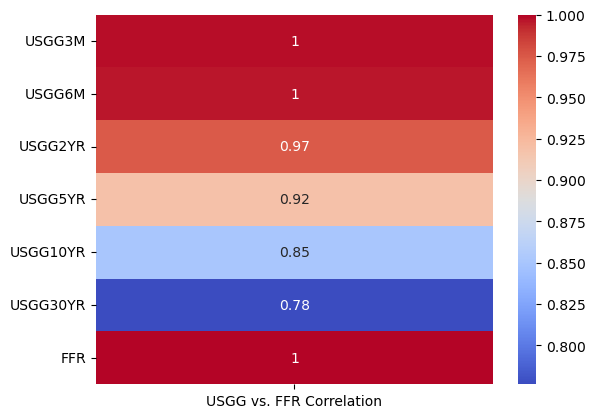

In [12]:
correlation = Full_df.corr()['FFR']
correlation_df = pd.DataFrame({'USGG vs. FFR Correlation': correlation})

sns.heatmap(correlation_df, annot=True, cmap='coolwarm')

In [21]:
First2_df = pd.concat([yield_df.shift(252), FFR_df], axis = 1)
First2_df = First2_df.resample("Q").mean()
First2_df = First2_df.tail(-1)
First2_df = First2_df.rename({'Mid Price' : 'FFR'}, axis = 1)

<AxesSubplot: >

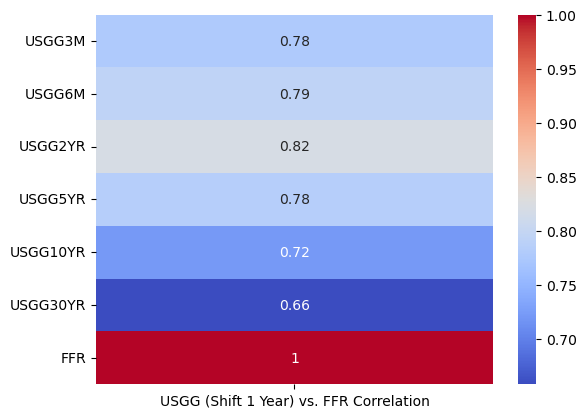

In [23]:
correlation = First2_df.corr()['FFR']
correlation_df = pd.DataFrame({'USGG (Shift 1 Year) vs. FFR Correlation': correlation})

sns.heatmap(correlation_df, annot=True, cmap='coolwarm')